In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Mall_Customers.csv')


In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x = df.iloc[:,3:]
x


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

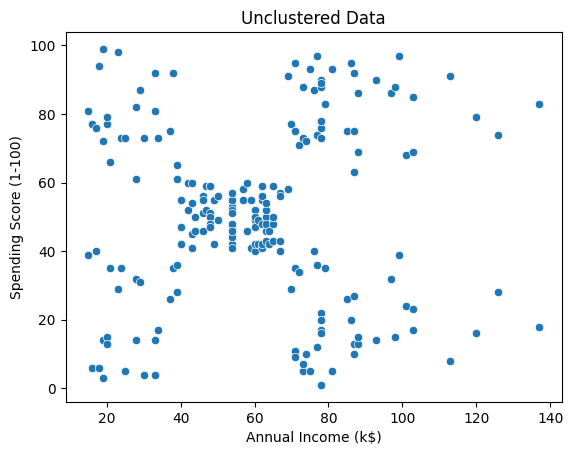

In [ ]:
plt.title('Unclustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering


In [ ]:
km = KMeans(n_clusters=4)


In [ ]:
km.fit_predict(x)


array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
km.inertia_


73880.64496247198

In [ ]:
sse =[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)


In [ ]:
sse


[269981.28000000014,
 183811.2827701642,
 132087.72428243395,
 73880.64496247198,
 44448.45544793369,
 37455.98455516028,
 31908.369338905773,
 29032.755525675864,
 23217.149183403366,
 19738.018808610275,
 18195.862749661686,
 16376.926157934304,
 16069.056782106782,
 13892.851775417566,
 13358.973692973697]

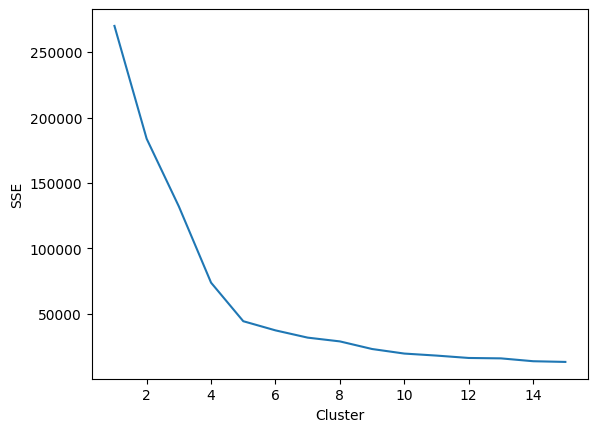

In [ ]:
# Create a DataFrame from the range and sse list
data = pd.DataFrame({'Cluster': range(1, 16), 'SSE': sse})

# Now use the DataFrame in the lineplot function
sns.lineplot(x='Cluster', y='SSE', data=data)
plt.xlabel('Cluster')
plt.ylabel('SSE')
plt.show()


In [ ]:
#Method second or alternative for elbow method
from sklearn.metrics import silhouette_score


In [ ]:
silh =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)


In [ ]:
silh


[0.3547422351496376,
 0.46761358158775435,
 0.4931963109249047,
 0.5532176107575425,
 0.5375812731362782,
 0.4531475923459476,
 0.5084998856975558,
 0.481045544226185,
 0.4260999236970563,
 0.43176425493006093,
 0.4211991439916951,
 0.4168132317302459,
 0.42468355664523705,
 0.4190808970725811]

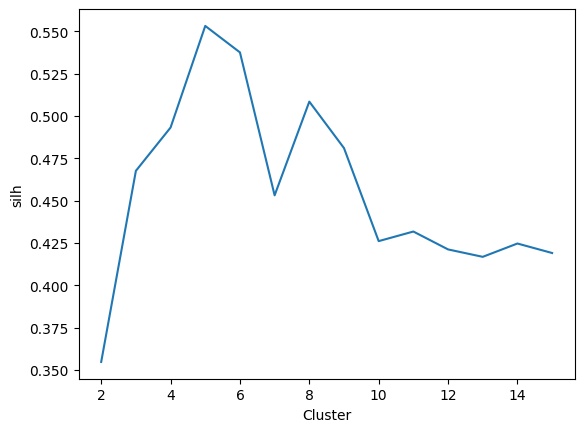

In [ ]:
# Create a DataFrame with 'Cluster' and 'silh' columns
data = pd.DataFrame({'Cluster': range(2, 16), 'silh': silh})

# Use the DataFrame in the lineplot function
sns.lineplot(x='Cluster', y='silh', data=data)
plt.xlabel('Cluster')
plt.ylabel('silh')
plt.show()

<BarContainer object of 14 artists>

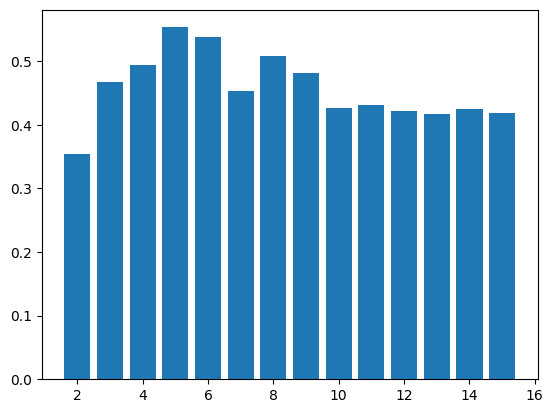

In [ ]:
plt.bar(range(2,16,1),silh)


In [ ]:
km = KMeans(n_clusters=5,random_state=1)


In [ ]:
labels = km.fit_predict(x)


In [ ]:
km.labels_


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
cent = km.cluster_centers_


<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

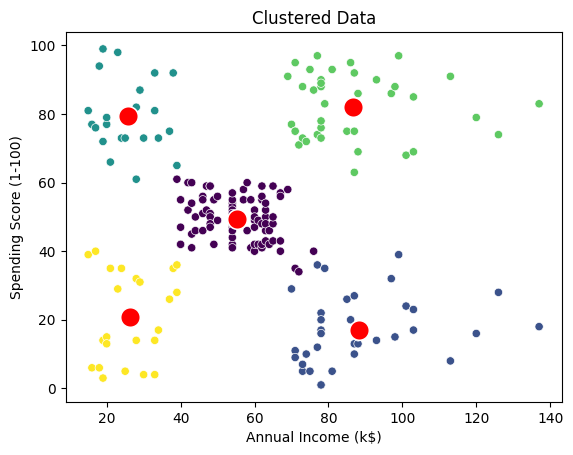

In [ ]:
plt.title('Clustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
# Provide x and y as keyword arguments instead of positional arguments
sns.scatterplot(x=cent[:,0], y=cent[:,1], s=200, color='red')

In [ ]:
agl = AgglomerativeClustering(n_clusters=5)


In [ ]:
alabels = agl.fit_predict(x)


In [ ]:
alabels


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<Axes: title={'center': 'KMEANS'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

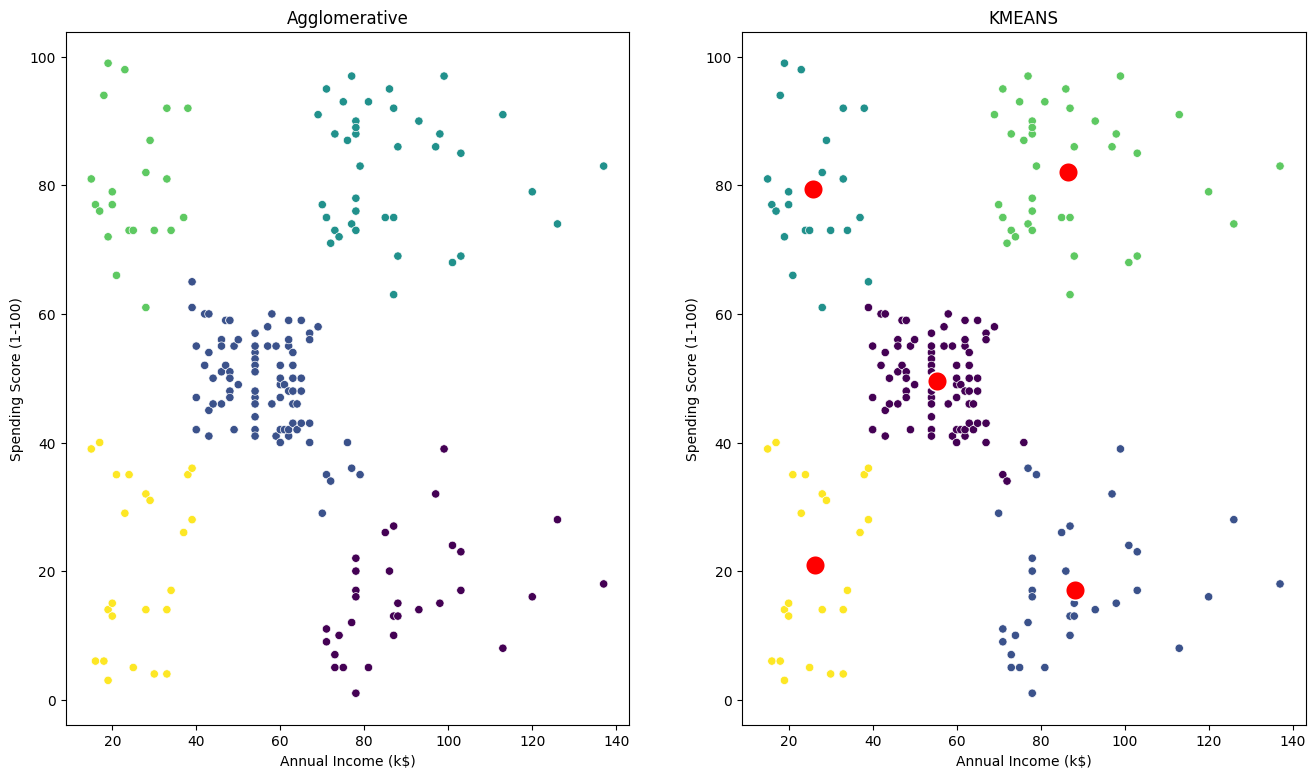

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,2,2)
plt.title('KMEANS')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
# Provide x and y as keyword arguments instead of positional arguments
sns.scatterplot(x=cent[:,0], y=cent[:,1], s=200, color='red')